In [22]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import random
import os
import time

### Load Yelp User Data

In [23]:
user_data = []
start = time.time()
with open('yelp_dataset/yelp_academic_dataset_user.json', encoding="utf8") as fin:
    print('Reading yelp_academic_dataset_user.json')
    for line in fin:
        user = json.loads(line)
        user_data.append(user)
end = time.time()
duration = end-start
print("Time taken to load user data: %d seconds" %duration)
print(str(len(user_data)) + ' user records loaded')

Reading yelp_academic_dataset_user.json
Time taken to load user data: 23 seconds
2189457 user records loaded


### Load Yelp Business Data

In [24]:
business_data = []
start = time.time()
with open('yelp_dataset/yelp_academic_dataset_business.json', encoding="utf8") as fin:
    print('Reading yelp_academic_dataset_business.json')
    for line in fin:
        business = json.loads(line)
        business_data.append(business)

end = time.time()
duration = end-start
print("Time taken to load business data: %d seconds" %duration)
print(str(len(business_data)) + ' business records loaded')

Reading yelp_academic_dataset_business.json
Time taken to load business data: 2 seconds
160585 business records loaded


### Filter businesses to only show restaurants

In [25]:
restaurant_category = 'Restaurants'
restaurant_data = []
for business in business_data:
    try:
        if restaurant_category in business.get('categories',):
            restaurant_data.append(business)
    except:
        pass

print(str(len(business_data)) + ' business records reduced to ' + str(len(restaurant_data)) + ' restaurant records')

160585 business records reduced to 50763 restaurant records


### Filter restaurants to only show restaurants with 40 or more reviews

In [26]:
TX_restaurants = [restaurant for restaurant in restaurant_data if 'TX' in restaurant.get('state')]
TX_restaurants = [restaurant for restaurant in TX_restaurants if restaurant.get('review_count') >= 40]
print(str(len(restaurant_data)) + ' restaurant records reduced to ' + str(len(TX_restaurants)) + ' Texas restaurants with 40 or more reviews')

50763 restaurant records reduced to 3270 Texas restaurants with 40 or more reviews


### Output filtered restaurant json file

In [27]:
with open('TX_restaurants.json', 'a') as outfile:
    json.dump(TX_restaurants, outfile, indent=1)
print('Created TX_restaurants.json with ' + str(len(TX_restaurants)) + ' Texas restaurants')

Created TX_restaurants.json with 3270 Texas restaurants


### Parse Yelp review file and save review data

In [28]:
# Remove all users that don't have 50 or more reviews
min_review_count = 50
user_data = [user for user in user_data if user.get('review_count') >= min_review_count]

review_data = []
TX_restaurants_id = set([restaurant.get('business_id') for restaurant in TX_restaurants])
valid_user_id = set([user.get('user_id') for user in user_data])
start = time.time()
with open('yelp_dataset/yelp_academic_dataset_review.json', encoding="utf8") as fin:
    print('Reading yelp_academic_dataset_review.json')
    for line in fin:
        review = json.loads(line)
        if review.get('business_id') in TX_restaurants_id:
            if review.get('user_id') in valid_user_id:
                review_data.append(review)

end = time.time()
duration_without_dr = end-start
print("Time taken to load review data: %d seconds" %duration_without_dr)

Reading yelp_academic_dataset_review.json
Time taken to load review data: 52 seconds


### Only save reviews from users with more than 50 reviews on restaurants with more than 40 reviews

In [29]:
orginal_review_count = len(review_data)

while True:
    old_review_count = len(review_data)
    filter_user = set()
    filter_restaurant = set()
    user_review_count_TX = Counter(k['user_id'] for k in review_data)
    restaurant_review_count_TX = Counter(k['business_id'] for k in review_data)

    for user, user_count in user_review_count_TX.most_common():
        if user_count >= min_review_count:
            filter_user.add(user)

    for biz, biz_count in restaurant_review_count_TX.most_common():
        if biz_count >= 40:
            filter_restaurant.add(biz)       
    review_data[:] = [review for review in review_data if review.get('user_id') in filter_user and review.get('business_id') in filter_restaurant]
    if old_review_count == len(review_data):
        break
print(str(orginal_review_count) + ' review records for Texas reduced to ' + str(len(review_data)) + ' reviews from users with 40 or more reviews and on restaurants with 40 or more reviews')

335755 review records for Texas reduced to 36966 reviews from users with 40 or more reviews and on restaurants with 40 or more reviews


5.0    10119
4.0    15801
3.0     7378
2.0     2829
1.0      839
Name: stars, dtype: int64


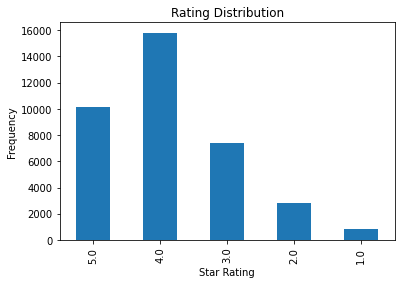

In [30]:
df = pd.DataFrame(review_data)
print(df['stars'].value_counts().sort_index(ascending=False))
df.stars.value_counts().sort_index(ascending=False).plot(kind="bar",title='Rating Distribution',xlabel='Star Rating',ylabel="Frequency");

### Output filtered Review json file

In [31]:
with open('TX_reviews.json', 'a') as outfile:
    json.dump(review_data, outfile, indent=1)
print('Created TX_reviews.json with ' + str(len(review_data)) + ' reviews on Texas restaurants')

Created TX_reviews.json with 36966 reviews on Texas restaurants


In [32]:
TX_users = []
TX_user_id = set([review.get('user_id') for review in review_data])
for user in user_data:
    if user.get('user_id') in TX_user_id:
        TX_users.append(user)
print(str(len(TX_users)) + ' users in texas with more than '+ str(max_review_count) +' reviews on popular restaurants')

455 users in texas with more than 50 reviews on popular restaurants


### Output filtered User json file

In [33]:
with open('TX_users.json', 'a') as outfile:
    json.dump(TX_users, outfile, indent=1)
print('Created TX_users.json with ' + str(len(TX_users)) + ' Texas Yelp users')

Created TX_users.json with 455 Texas Yelp users
